<a href="https://colab.research.google.com/github/RasaRaj/ANN/blob/main/MobileNet%20Model/Fine_Tuning_MobileNet%20model_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
print(tf.__version__)

2.12.0


In [23]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='Final_datateset_for_Image.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('Final_datateset_for_Image.zip')
f.keys()
!unzip Final_datateset_for_Image.zip

Streaming output truncated to the last 5000 lines.
  inflating: Final datateset for Image/validation/happy/15767.jpg  
  inflating: Final datateset for Image/validation/happy/15791.jpg  
  inflating: Final datateset for Image/validation/happy/15843.jpg  
  inflating: Final datateset for Image/validation/happy/15854.jpg  
  inflating: Final datateset for Image/validation/happy/15885.jpg  
  inflating: Final datateset for Image/validation/happy/15910.jpg  
  inflating: Final datateset for Image/validation/happy/15966.jpg  
  inflating: Final datateset for Image/validation/happy/15976.jpg  
  inflating: Final datateset for Image/validation/happy/15983.jpg  
  inflating: Final datateset for Image/validation/happy/16037.jpg  
  inflating: Final datateset for Image/validation/happy/16042.jpg  
  inflating: Final datateset for Image/validation/happy/16064.jpg  
  inflating: Final datateset for Image/validation/happy/16076.jpg  
  inflating: Final datateset for Image/validation/happy/16081.jpg

In [24]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.layers.serialization import activation
import numpy as np
     

In [25]:
train_dir = '/content/Final datateset for Image/train'
validation_dir = '/content/Final datateset for Image/validation'

In [26]:
# preprocessing

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224,224),
                                                    batch_size=50,
                                                    class_mode ='categorical',
                                                    subset='training')

Found 17514 images belonging to 13 classes.


In [27]:
test_generator = train_datagen.flow_from_directory(validation_dir,
                                                   target_size=(224,224),
                                                   batch_size=50,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 2939 images belonging to 13 classes.


In [28]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from glob import glob

In [29]:
base_model = keras.applications.MobileNetV2(
    weights= 'imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False,
)
base_model.output

<KerasTensor: shape=(None, 7, 7, 1280) dtype=float32 (created by layer 'out_relu')>

In [30]:
for layer in base_model.layers:
  layer.trainable = True

In [31]:
x=Flatten()(base_model.output)
prediction=Dense(13, activation= 'softmax')(x)
model=Model(inputs=base_model.input, outputs=prediction)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history=model.fit(train_generator,epochs=25)

Epoch 1/25
351/351 [==============================] - 254s 581ms/step - loss: 1.9674 - accuracy: 0.3587
Epoch 2/25
351/351 [==============================] - 200s 569ms/step - loss: 1.5332 - accuracy: 0.4616
Epoch 3/25
351/351 [==============================] - 199s 567ms/step - loss: 1.4311 - accuracy: 0.4770
Epoch 4/25
351/351 [==============================] - 200s 569ms/step - loss: 1.2787 - accuracy: 0.5234
Epoch 5/25
351/351 [==============================] - 199s 567ms/step - loss: 1.3834 - accuracy: 0.5049
Epoch 6/25
351/351 [==============================] - 199s 568ms/step - loss: 1.4606 - accuracy: 0.4652
Epoch 7/25
351/351 [==============================] - 199s 566ms/step - loss: 1.3088 - accuracy: 0.5074
Epoch 8/25
351/351 [==============================] - 199s 566ms/step - loss: 1.4335 - accuracy: 0.4772
Epoch 9/25
351/351 [==============================] - 198s 565ms/step - loss: 1.2858 - accuracy: 0.5136
Epoch 10/25
351/351 [==============================] - 199s 566m

Accuracy:  0.6598721146583557


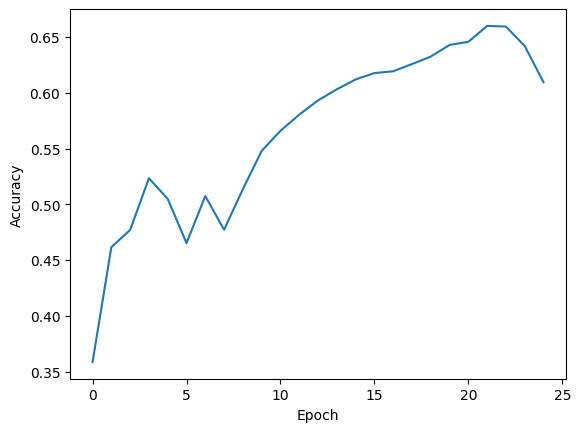

In [34]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
print("Accuracy: ",max(history.history['accuracy']))
plt.show()

In [35]:
model.save('E:\BAUST\7th Semester\CSE 4132 Neural Network Sessional\Project\model\Fine_Tuning_MobileNet_model.h5')

In [36]:
# Tesing
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the pre-trained model
model = tf.keras.models.load_model('E:\BAUST\7th Semester\CSE 4132 Neural Network Sessional\Project\model\Fine_Tuning_MobileNet_model.h5')

In [37]:
# Define the classes
classes = ['angry', 'disgust', 'fear', 'happy', 'joiariya', 'meghna', 'netural', 'nitul', 'rafat', 'rasa', 'romiz', 'sad', 'surprise']

In [38]:
# Load the image to be tested
image = Image.open('/content/Final datateset for Image/validation/sad/172.jpg')

# Convert the image to RGB format
image = image.convert('RGB')

# Resize the image to the same size used for training the model
image = image.resize((224, 224))

# Convert the image to a numpy array
image_array = np.asarray(image)

# Normalize the pixel values to be between 0 and 1
image_array = image_array / 255.0

# Add a batch dimension to the image array
image_array = np.expand_dims(image_array, axis=0)

In [39]:
# Predict the class of the image using the pre-trained model
predictions = model.predict(image_array)
     

1/1 [==============================] - 1s 1s/step


In [40]:
# Get the index of the predicted class
predicted_class_index = np.argmax(predictions, axis=1)[0]

# Get the name of the predicted class
predicted_class = classes[predicted_class_index]

# Print the predicted class
print('The predicted class is:', predicted_class)

The predicted class is: surprise
